In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta



In [4]:
csv_file_path = 'EDA.csv'

# Open the CSV file
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.reader(csv_file)

    # Get the first row from the CSV file
    first_row = next(csv_reader)

    # Assuming the first value in the first row is the one you want to store as a variable
    first_value = first_row[0]

# Now, 'first_value' contains the first value from the CSV file
print("First Value:", first_value)

import datetime

timestamp2 = float(first_value)
print(timestamp2)

dt_object = datetime.datetime.fromtimestamp(timestamp2)
print(dt_object)
formatted_date = dt_object.strftime('%Y-%m-%d %H:%M:%S:%f')

# with open('EDA.csv','r') as csv_file:
#     first_line = csv_file.readline()
#     first_value = float(re.sub(r'\s+', '', first_line))

# print("First Value:", first_value)

df1 = pd.read_csv('EDA.csv')
df2 = pd.read_csv('TEMP.csv')

time_increment = 250
# df1['Formatted_Date'] = pd.to_datetime(first_value, unit='s')
df1['Formatted_Date'] = dt_object
print(df1.iloc[0])
# print("First Value:", first_value)
df1['Formatted_Date'] += pd.to_timedelta(df1.index * time_increment, unit='ms')

# combined_data = pd.concat([df1, df2], axis=1)

# combined_data.to_csv('EDA+TEMPv2.csv', index=False)
time=df1['Formatted_Date']
eda = df1['1698052252.000000']
temp = df2['1698052252.000000']

print(eda)
print(time)
print(temp)


First Value: 1698052252.000000
1698052252.0
2023-10-23 11:10:52
1698052252.000000               0.292196
Formatted_Date       2023-10-23 11:10:52
Name: 0, dtype: object
0         0.292196
1         0.342177
2         0.343459
3         0.344740
4         0.346022
            ...   
134450    0.239919
134451    0.241201
134452    0.242482
134453    0.241201
134454    0.243764
Name: 1698052252.000000, Length: 134455, dtype: float64
0        2023-10-23 11:10:52.000
1        2023-10-23 11:10:52.250
2        2023-10-23 11:10:52.500
3        2023-10-23 11:10:52.750
4        2023-10-23 11:10:53.000
                   ...          
134450   2023-10-23 20:31:04.500
134451   2023-10-23 20:31:04.750
134452   2023-10-23 20:31:05.000
134453   2023-10-23 20:31:05.250
134454   2023-10-23 20:31:05.500
Name: Formatted_Date, Length: 134455, dtype: datetime64[ns]
0          4.00
1         31.79
2         31.79
3         31.79
4         31.79
          ...  
134452    30.33
134453    30.13
134454    30.13

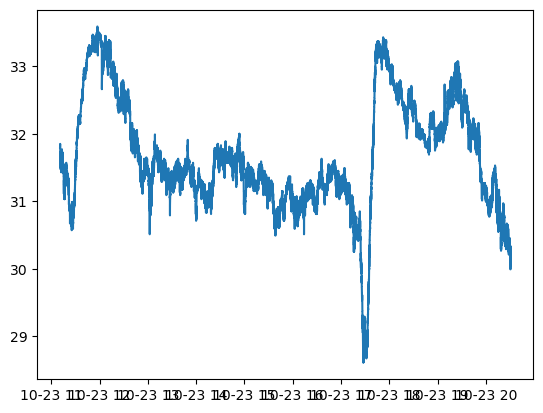

In [5]:
# Remove the first two rows
temp = temp.iloc[2:]
plt.plot(time, temp)

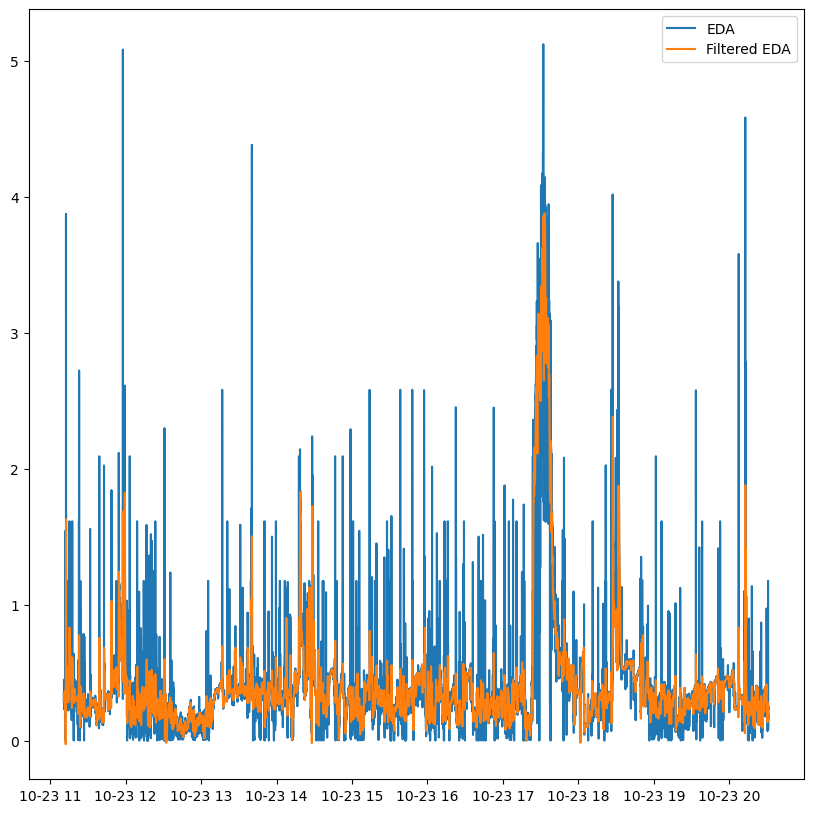

In [6]:
from scipy.signal import  filtfilt, butter
order = 5 #order of the filter, expressed as integer
f_cut_off = 5 #Hz, cut-off frequency
filter_type = 'low' #low pass filter
f_sampling = 500 #Hz, sampling frequency
b, a = butter(order, f_cut_off, btype=filter_type, fs = f_sampling)
acc_x = eda
filtered_acc_x = filtfilt(b,a,acc_x)
plt.figure(figsize=(10, 10))
plt.plot(time, acc_x, label='EDA')
plt.plot(time, filtered_acc_x, label='Filtered EDA')
plt.legend()

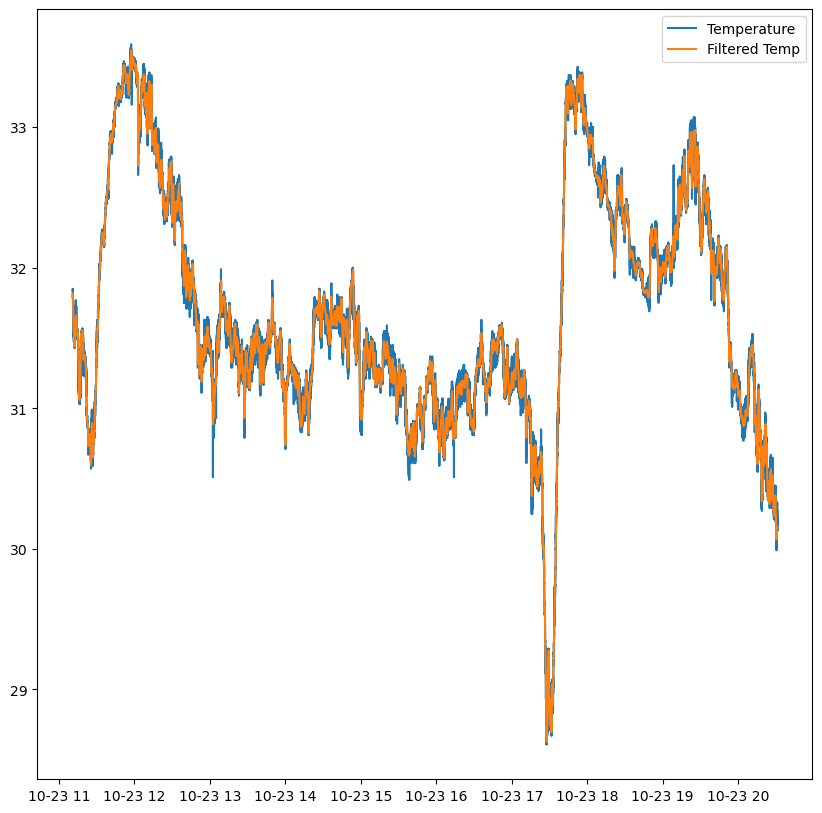

In [8]:
order = 5 #order of the filter, expressed as integer
f_cut_off = 5 #Hz, cut-off frequency
filter_type = 'low' #low pass filter
f_sampling = 500 #Hz, sampling frequency
b, a = butter(order, f_cut_off, btype=filter_type, fs = f_sampling)
acc_x = temp
filtered_acc_x = filtfilt(b,a,acc_x)
plt.figure(figsize=(10, 10))
plt.plot(time, acc_x, label='Temperature')
plt.plot(time, filtered_acc_x, label='Filtered Temp')
plt.legend()

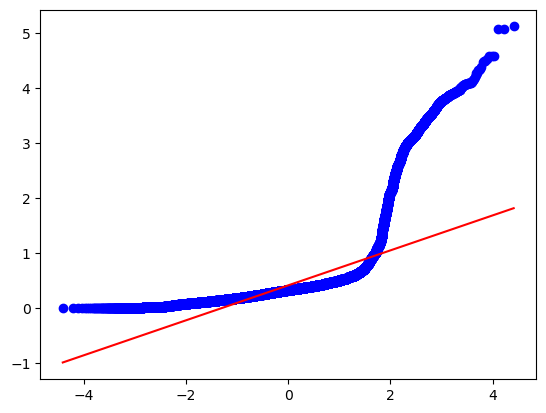

In [ ]:
import scipy.stats as stats
# Q-Q plot for EDA data
stats.probplot(eda, dist="norm", plot=plt)
plt.title = ("Q-Q Plot for EDA")
plt.show()

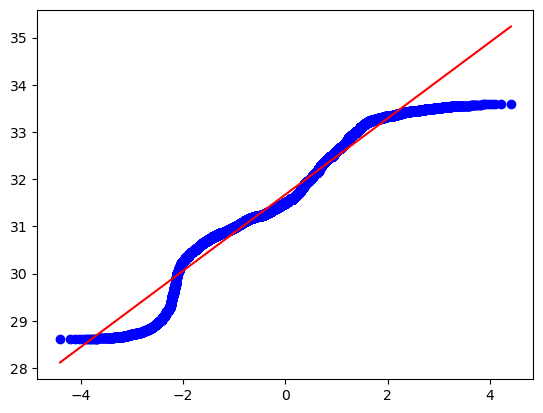

In [ ]:
# Q-Q plot for Temperature data
stats.probplot(temp, dist="norm", plot=plt)
plt.title = ("Q-Q Plot for Temp")
plt.show()

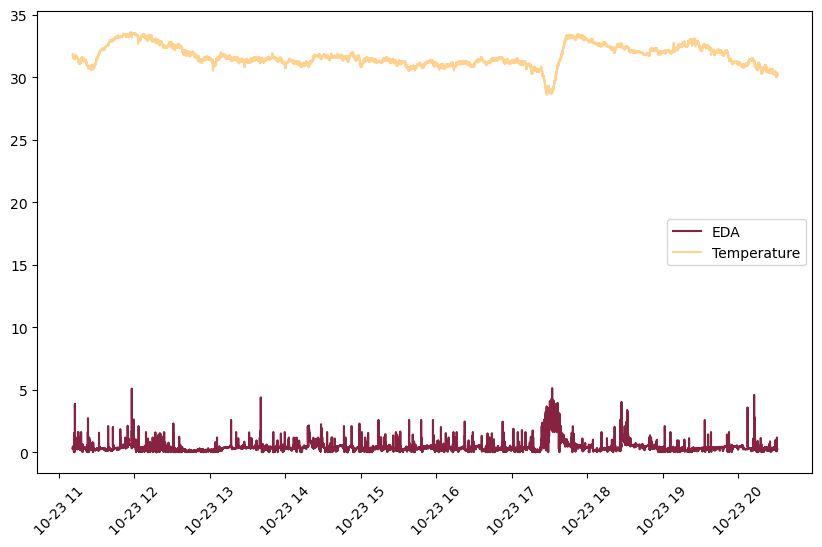

In [ ]:


plt.figure(figsize=(10, 6))

# Plot 'EDA' as a blue line
plt.plot(time, eda, label='EDA', color='#872341')

# Plot 'Temp' as a red line
plt.plot(time, temp, label='Temperature', color='#FFD28F')

plt.title = ('EDA and Temp Over Time')
plt.xlabel = ('Time')
plt.ylabel = ('Values')
plt.grid = (True)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


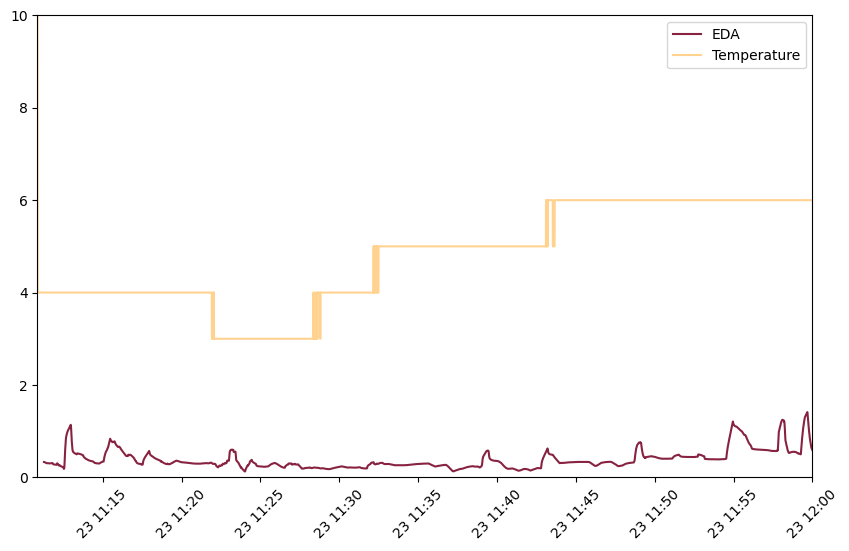

In [ ]:


# Assuming you have separate 'time', 'eda', and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'EDA': eda, 'Temp': temp})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'EDA' data
window_size = 100  # Adjust the window size for smoothing
data['Smoothed_EDA'] = data['EDA'].rolling(window=window_size).mean()

# Define a mapping function to map 'Temp' values to the specified ranges
def map_temp(temp):
    if temp < 28:
        return 1
    elif 29 <= temp < 30:
        return 2
    elif 30 <= temp < 31:
        return 3
    elif 31 <= temp < 32:
        return 4
    elif 32 <= temp < 33:
        return 5
    elif 33 <= temp < 34:
        return 6
    elif 34 <= temp < 35:
        return 7
    elif 35 <= temp < 36:
        return 8
    elif 36 <= temp < 37:
        return 9
    else:
        return 10
    

# Apply the mapping function to the 'Temp' column
data['Modified Temp'] = data['Temp'].apply(map_temp)

# Create a line graph to visualize the smoothed 'EDA' and modified 'Temp' over time
plt.figure(figsize=(10, 6))



# Plot smoothed 'EDA' as a blue line
plt.plot(data['Time'], data['Smoothed_EDA'], label='EDA', color='#872341')

# Plot modified 'Temp' as a red line
plt.plot(data['Time'], data['Modified Temp'], label='Temperature', color='#FFD28F')

plt.title=('Smoothed EDA and Modified Temp Over Time')
plt.xlabel=('Time')
plt.ylabel=('Values')
plt.grid = (True)
plt.legend()
plt.ylim(0, 10)

# Optionally, set a specific time range 
start_time = pd.to_datetime(time.min()) 
#  # Replace with your start time
end_time = pd.to_datetime("2023-10-23 12:00:00")   
#  Replace with your end time
plt.xlim(start_time, end_time)


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()



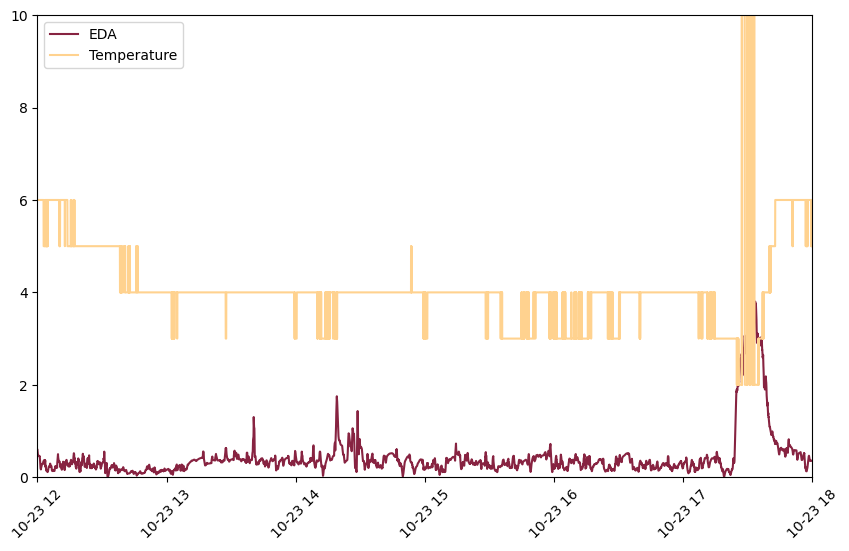

In [ ]:


# Assuming you have separate 'time', 'eda', and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'EDA': eda, 'Temp': temp})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'EDA' data
window_size = 100  # Adjust the window size for smoothing
data['Smoothed_EDA'] = data['EDA'].rolling(window=window_size).mean()

# Define a mapping function to map 'Temp' values to the specified ranges
def map_temp(temp):
    if temp < 28:
        return 1
    elif 29 <= temp < 30:
        return 2
    elif 30 <= temp < 31:
        return 3
    elif 31 <= temp < 32:
        return 4
    elif 32 <= temp < 33:
        return 5
    elif 33 <= temp < 34:
        return 6
    elif 34 <= temp < 35:
        return 7
    elif 35 <= temp < 36:
        return 8
    elif 36 <= temp < 37:
        return 9
    else:
        return 10
    

# Apply the mapping function to the 'Temp' column
data['Modified Temp'] = data['Temp'].apply(map_temp)

# Create a line graph to visualize the smoothed 'EDA' and modified 'Temp' over time
plt.figure(figsize=(10, 6))



# Plot smoothed 'EDA' as a blue line
plt.plot(data['Time'], data['Smoothed_EDA'], label='EDA', color='#872341')

# Plot modified 'Temp' as a red line
plt.plot(data['Time'], data['Modified Temp'], label='Temperature', color='#FFD28F')

plt.title=('Smoothed EDA and Modified Temp Over Time')
plt.xlabel=('Time')
plt.ylabel=('Values')
plt.grid = (True)
plt.legend()
plt.ylim(0, 10)

# Optionally, set a specific time range 
start_time = pd.to_datetime("2023-10-23 12:00:00") 
#  # Replace with your start time
end_time = pd.to_datetime("2023-10-23 18:00:00")   
#  Replace with your end time
plt.xlim(start_time, end_time)


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()



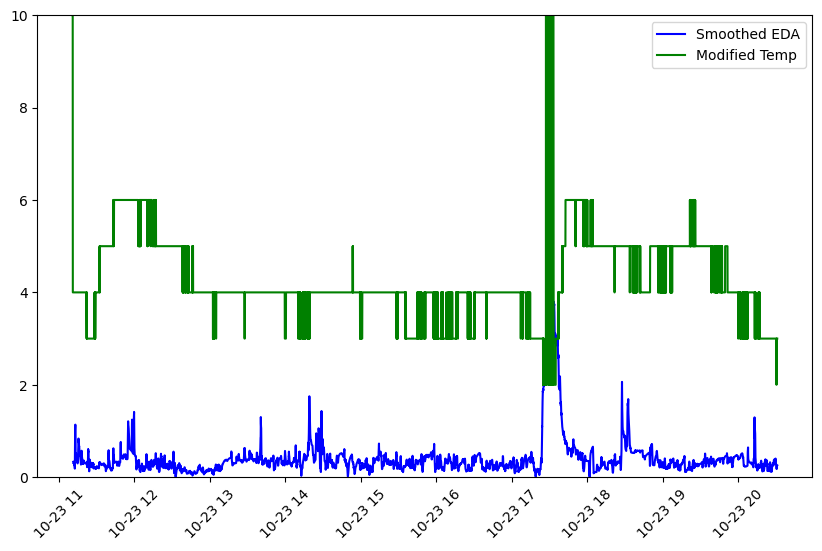

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have separate 'time', 'eda', and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'EDA': eda, 'Temp': temp})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'EDA' data
window_size = 100  # Adjust the window size for smoothing
data['Smoothed_EDA'] = data['EDA'].rolling(window=window_size).mean()

# Define a mapping function to map 'Temp' values to the specified ranges
def map_temp(temp):
    if temp < 28:
        return 1
    elif 29 <= temp < 30:
        return 2
    elif 30 <= temp < 31:
        return 3
    elif 31 <= temp < 32:
        return 4
    elif 32 <= temp < 33:
        return 5
    elif 33 <= temp < 34:
        return 6
    elif 34 <= temp < 35:
        return 7
    elif 35 <= temp < 36:
        return 8
    elif 36 <= temp < 37:
        return 9
    else:
        return 10
    

# Apply the mapping function to the 'Temp' column
data['Modified Temp'] = data['Temp'].apply(map_temp)

# Create a line graph to visualize the smoothed 'EDA' and modified 'Temp' over time
plt.figure(figsize=(10, 6))

# Plot smoothed 'EDA' as a blue line
plt.plot(data['Time'], data['Smoothed_EDA'], label='Smoothed EDA', color='blue')

# Plot modified 'Temp' as a red line
plt.plot(data['Time'], data['Modified Temp'], label='Modified Temp', color='green')

plt.title=('Smoothed EDA and Modified Temp Over Time')
plt.xlabel=('Time')
plt.ylabel=('Values')
plt.grid = (True)
plt.legend()

plt.ylim(0, 10)

# # Optionally, set a specific time range
# start_time = pd.to_datetime("2023-10-23 16:15:30")  # Replace with your start time
# end_time = pd.to_datetime("2023-10-23 18:08:00")    # Replace with your end time
# plt.xlim(start_time, end_time)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()



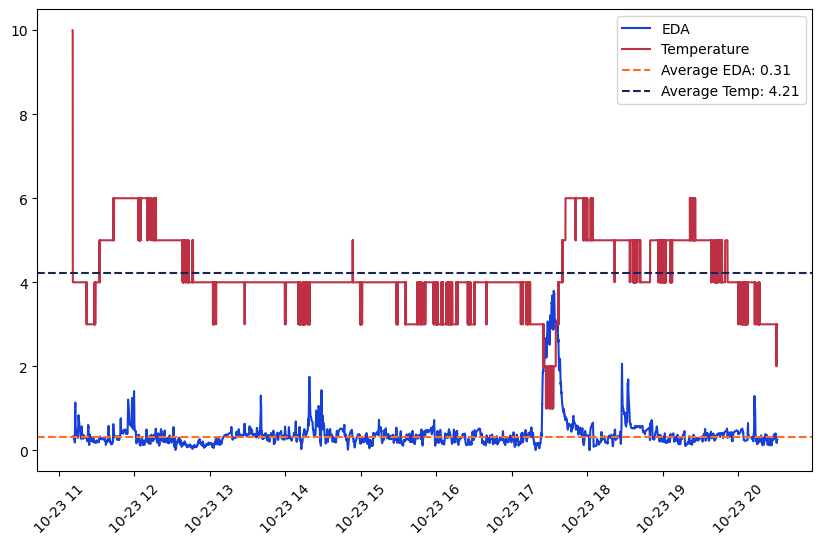

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have separate 'time', 'eda', and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'EDA': eda, 'Temp': temp})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'EDA' data
window_size = 100  # Adjust the window size for smoothing
data['Smoothed_EDA'] = data['EDA'].rolling(window=window_size).mean()

# Define a mapping function to map 'Temp' values to the specified ranges
def map_temp(temp):
    if temp < 29:
        return 1
    elif 29 <= temp < 30:
        return 2
    elif 30 <= temp < 31:
        return 3
    elif 31 <= temp < 32:
        return 4
    elif 32 <= temp < 33:
        return 5
    elif 33 <= temp < 34:
        return 6
    elif 34 <= temp < 35:
        return 7
    elif 35 <= temp < 36:
        return 8
    elif 36 <= temp < 37:
        return 9
    else:
        return 10

# Apply the mapping function to the 'Temp' column
data['Modified Temp'] = data['Temp'].apply(map_temp)

# Define a mapping function to scale 'EDA' values from [0, 13] to [0, 10]
def map_eda(eda):
    return (eda / 13) * 10

# Apply the scaling function to the 'EDA' column
data['Modified EDA'] = data['EDA'].apply(map_eda)

# Calculate the average of 'EDA' and 'Temp'
average_eda = data['Modified EDA'].mean()
average_temp = data['Modified Temp'].mean()

# Create a line graph to visualize the smoothed 'EDA' and modified 'Temp' over time
plt.figure(figsize=(10, 6))

# Plot smoothed 'EDA' as a blue line
plt.plot(data['Time'], data['Smoothed_EDA'], label='EDA', color='#1640D6')

# Plot modified 'Temp' as a red line
plt.plot(data['Time'], data['Modified Temp'], label='Temperature', color='#BE3144')

# Plot average 'EDA' as a horizontal green line
plt.axhline(average_eda, color='#FF6C22', linestyle='--', label=f'Average EDA: {average_eda:.2f}')

# Plot average 'Temp' as a horizontal purple line
plt.axhline(average_temp, color='#192655', linestyle='--', label=f'Average Temp: {average_temp:.2f}')

plt.title = ('EDA, Temperature, and Averages Over Time')
plt.xlabel = ('Time')
plt.ylabel = ('Values')
plt.grid = (True)
plt.legend()

# Optionally, set a specific time range
# start_time = pd.to_datetime("2023-10-23 9:15:30")  # Replace with your start time
# end_time = pd.to_datetime("2023-10-23 17:30:00")    # Replace with your end time
# plt.xlim(start_time, end_time)


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
# Assuming 'Time' is in datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Extract the hour from the 'Time' column
data['Hour'] = data['Time'].dt.hour

# Categorize time into morning, afternoon, and night based on the hour
bins = [-1, 5, 12, 18]
labels = ['Night', 'Morning', 'Afternoon']  # Adjusted labels to ensure uniqueness
data['Time_Category'] = pd.cut(data['Hour'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average for 'Modified EDA' and 'Modified Temp' for each time category
average_by_time = data.groupby('Time_Category').agg({'Modified EDA': 'mean', 'Modified Temp': 'mean'}).reset_index()

# Display the calculated averages
print(average_by_time)

  Time_Category  Modified EDA  Modified Temp
0         Night           NaN            NaN
1       Morning      0.223370       4.834606
2     Afternoon      0.359327       4.016435


In [ ]:
def above_mean_matrix(average_by_time, data):
    # Calculate the mean of 'Modified EDA' and 'Modified Temp' for the entire day
    overall_mean_eda = data['Modified EDA'].mean()
    overall_mean_temp = data['Modified Temp'].mean()

    # Create a matrix of "Yes" or "No" based on whether the values are above the mean
    matrix = pd.DataFrame(index=average_by_time['Time_Category'], columns=['Above Mean EDA', 'Above Mean Temp'])

    matrix['Above Mean EDA'] = np.where(average_by_time['Modified EDA'] > overall_mean_eda, 'Yes', 'No')
    matrix['Above Mean Temp'] = np.where(average_by_time['Modified Temp'] > overall_mean_temp, 'Yes', 'No')

    return matrix

# Example usage:
matrix_result = above_mean_matrix(average_by_time, data)
print(matrix_result)

              Above Mean EDA Above Mean Temp
Time_Category                               
Night                     No              No
Morning                   No             Yes
Afternoon                Yes              No


,Time_Category,Stress_Level
1,Morning,
2,Afternoon,
0,Night,

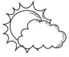
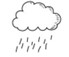
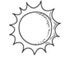

In [ ]:
from PIL import Image
from IPython.display import display, HTML
import io
import base64

# Assuming you have loaded the images
very_stressed_image = Image.open('Very_stressed.jpg')
not_stressed_image = Image.open('Not_stressed.jpg')
stressed_image = Image.open('Stressed.jpg')
maybe_stressed_image = Image.open('Maybe_stressed.jpg')

def image_to_base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

def combine_stress_levels_with_images(matrix_result):
    stress_levels = []

    for index, row in matrix_result.iterrows():
        if row['Above Mean EDA'] == 'Yes' and row['Above Mean Temp'] == 'Yes':
            stress_levels.append(very_stressed_image)
        elif row['Above Mean EDA'] == 'No' and row['Above Mean Temp'] == 'No':
            stress_levels.append(not_stressed_image)
        elif row['Above Mean EDA'] == 'Yes' and row['Above Mean Temp'] == 'No':
            stress_levels.append(stressed_image)
        elif row['Above Mean EDA'] == 'No' and row['Above Mean Temp'] == 'Yes':
            stress_levels.append(maybe_stressed_image)

    stress_level_result = pd.DataFrame({'Time_Category': matrix_result.index, 'Stress_Level': stress_levels})

    # Convert images to base64 and embed them in HTML
    stress_level_result['Stress_Level'] = stress_level_result['Stress_Level'].apply(lambda img: f'<img src="data:image/png;base64,{image_to_base64(img)}" width="50">')

    # Reorder the rows based on the desired order: Morning, Afternoon, Night
    stress_level_result = stress_level_result.reindex([1, 2, 0])

    return stress_level_result

# Example usage:
stress_level_result_with_images = combine_stress_levels_with_images(matrix_result)
display(HTML(stress_level_result_with_images.to_html(escape=False)))






Pearson's correlation coefficient: -0.31955752871116083
P-value: 0.0


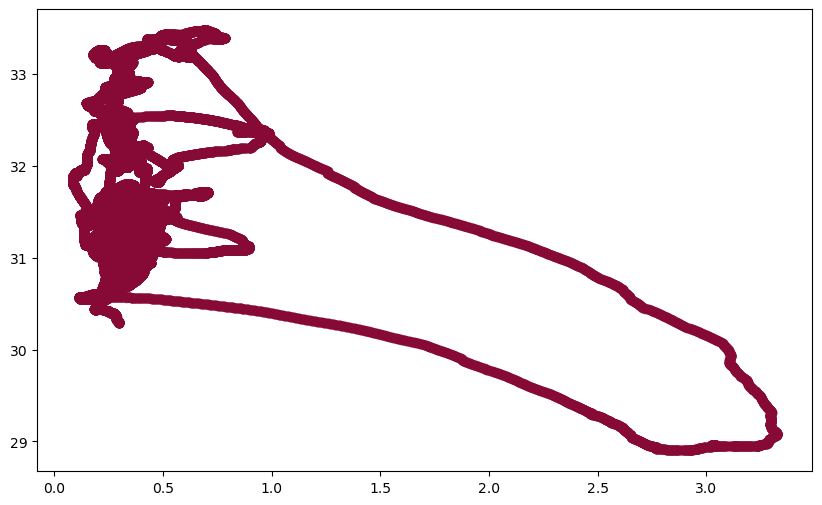

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Assuming you have separate 'time', 'eda', and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'EDA': eda, 'Temp': temp})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'EDA' and 'Temp' data
window_size = 1000  # Adjust the window size for smoothing
data['Smoothed_EDA'] = data['EDA'].rolling(window=window_size).mean()
data['Smoothed_Temp'] = data['Temp'].rolling(window=window_size).mean()

# Calculate Pearson's correlation coefficient between 'Smoothed_EDA' and 'Smoothed_Temp'
correlation_coefficient, p_value = pearsonr(data['Smoothed_EDA'].dropna(), data['Smoothed_Temp'].dropna())

# Print the correlation coefficient and p-value
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['Smoothed_EDA'], data['Smoothed_Temp'], color='#860A35', alpha=0.5)
plt.title = ('Scatter Plot of Smoothed EDA vs. Smoothed Temp')
plt.xlabel = ('Smoothed EDA')
plt.ylabel = ('Smoothed Temp')
plt.grid = (True)
plt.show()


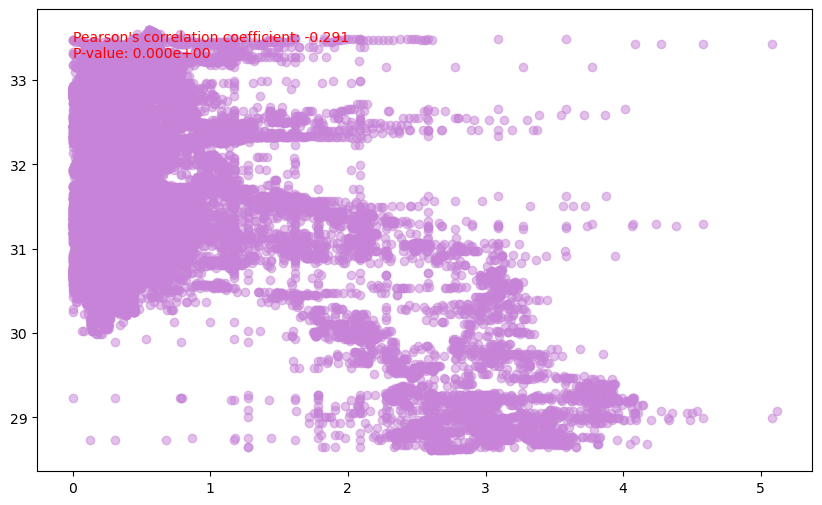

In [ ]:
correlation_coefficient, p_value = pearsonr(eda, temp)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(eda, temp, color='#C683D7', alpha=0.5)
plt.title = ('Scatter Plot of EDA vs. Temp')
plt.xlabel = ('EDA')
plt.ylabel = ('Temp')
plt.grid = (True)

# Display the correlation coefficient and p-value on the plot
plt.text(min(eda), max(temp), f"Pearson's correlation coefficient: {correlation_coefficient:.3f}\nP-value: {p_value:.3e}", verticalalignment='top', horizontalalignment='left', color='red')

# Show the plot
plt.show()

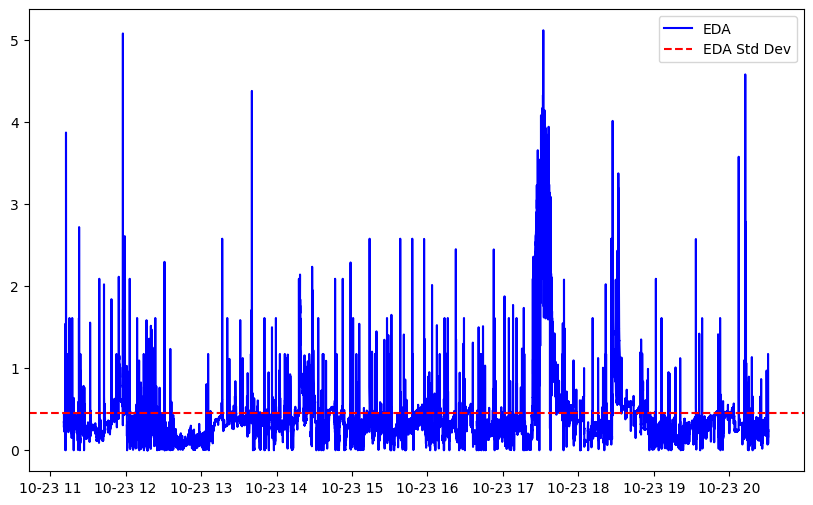

Standard Deviation of Temp: 0.4502320824422293


In [ ]:
# Assuming you have the 'eda' array
# Calculate the standard deviation of 'eda'
eda_std = np.std(eda)

# Create a line plot showing the standard deviation over time
plt.figure(figsize=(10, 6))
plt.plot(time, eda, label='EDA', color='blue')
plt.title = ('EDA with Standard Deviation')
plt.xlabel = ('Time')
plt.ylabel = ('EDA Values')

# Display the standard deviation as a horizontal line
plt.axhline(y=eda_std, color='red', linestyle='--', label='EDA Std Dev')

plt.legend()
plt.grid = (True)
plt.show()

print(f"Standard Deviation of Temp: {eda_std}")


Standard Deviation of Smoothed EDA: 0.40779969944707084


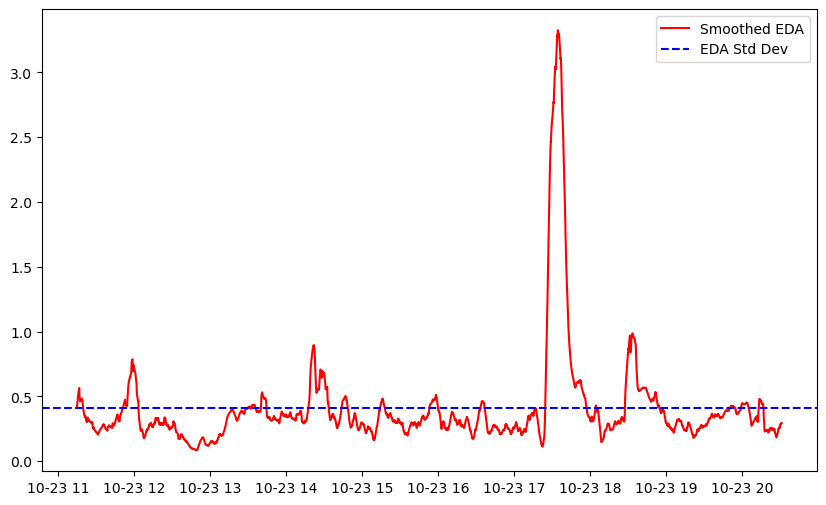

In [ ]:
# Assuming you have separate 'time' and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'EDA': eda})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'Temp' data
window_size = 1000  # Adjust the window size for smoothing
data['Smoothed_EDA'] = data['EDA'].rolling(window=window_size).mean()

# Calculate the standard deviation of 'Smoothed_EDA'
smoothed_eda_std = np.std(data['Smoothed_EDA'].dropna())

# Print the standard deviation
print(f"Standard Deviation of Smoothed EDA: {smoothed_eda_std}")

# Create a line graph to visualize the smoothed 'EDA' and its standard deviation over time
plt.figure(figsize=(10, 6))

# Plot smoothed 'Temp' as a red line
plt.plot(data['Time'], data['Smoothed_EDA'], label='Smoothed EDA', color='red')

# Display the standard deviation as a horizontal line
plt.axhline(y=smoothed_eda_std, color='blue', linestyle='--', label='EDA Std Dev')

plt.title = ('Smoothed EDA Over Time with Standard Deviation')
plt.xlabel = ('Time')
plt.ylabel = ('Values')
plt.grid = (True)
plt.legend()

# Display the plot
plt.show()


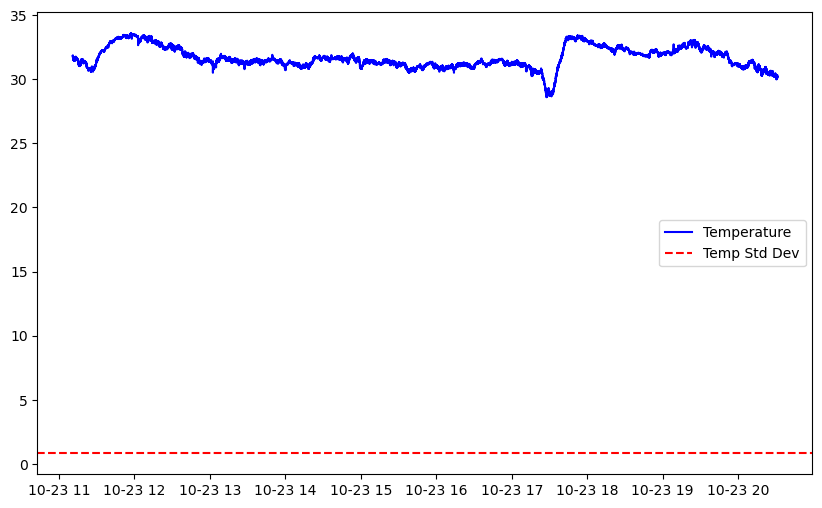

Standard Deviation of Smoothed Temp: 0.8234277483909802


In [ ]:
# Assuming you have the 'temp' array
# Calculate the standard deviation of 'temp'
temp_std = np.std(temp)

# Create a line plot of the temperature data
plt.figure(figsize=(10, 6))
plt.plot(time, temp, label='Temperature', color='blue')

# Display the standard deviation as a horizontal line
plt.axhline(y=temp_std, color='red', linestyle='--', label='Temp Std Dev')

plt.title = ('Temperature with Standard Deviation')
plt.xlabel = ('Time')
plt.ylabel = ('Temperature Values')

plt.legend()
plt.grid = (True)
plt.show()

print(f"Standard Deviation of Smoothed Temp: {temp_std}")


Standard Deviation of Smoothed Temp: 0.8086350270260944


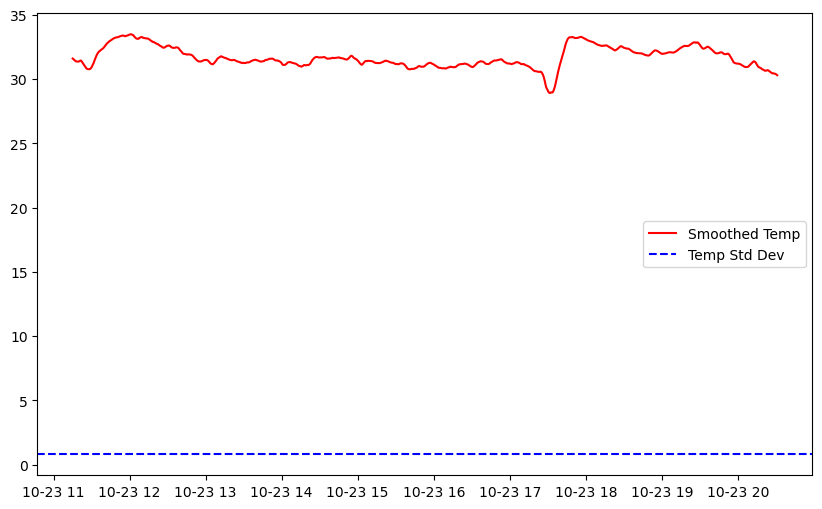

In [ ]:
# Assuming you have separate 'time' and 'temp' arrays
# Convert 'time' to datetime format for better time series plotting
time = pd.to_datetime(time)

# Create a DataFrame from the arrays
data = pd.DataFrame({'Time': time, 'Temp': temp})

# Sort the data by the 'Time' column (if not already sorted)
data = data.sort_values('Time')

# Apply moving average to 'Temp' data
window_size = 1000  # Adjust the window size for smoothing
data['Smoothed_Temp'] = data['Temp'].rolling(window=window_size).mean()

# Calculate the standard deviation of 'Smoothed_Temp'
smoothed_temp_std = np.std(data['Smoothed_Temp'].dropna())

# Print the standard deviation
print(f"Standard Deviation of Smoothed Temp: {smoothed_temp_std}")

# Create a line graph to visualize the smoothed 'Temp' and its standard deviation over time
plt.figure(figsize=(10, 6))

# Plot smoothed 'Temp' as a red line
plt.plot(data['Time'], data['Smoothed_Temp'], label='Smoothed Temp', color='red')

# Display the standard deviation as a horizontal line
plt.axhline(y=smoothed_temp_std, color='blue', linestyle='--', label='Temp Std Dev')

plt.title = ('Smoothed Temp Over Time with Standard Deviation')
plt.xlabel = ('Time')
plt.ylabel = ('Values')
plt.grid = (True)
plt.legend()

# Display the plot
plt.show()
